# LET'S GROW MORE INTERNSHIP -2023 APRIL
## NAME=SWARAJ SOLANKE

### Iris Flowers Classification ML Project :

# dataset information
### the dataset contain 3 classes 0f 50 instance of class refers to a type of iris plant .one class is linearity sepearble from other 2; the letter are not linearly sepearble from each other
### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# importing module 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn

# loading dataset

In [7]:
df=pd.read_csv("IRIS.csv")

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# to display stats about data
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# to display basic sample on each classs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
# to display no of samples on each class 
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# preprocessing the dataset 

In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# explorative data analysis 

<AxesSubplot:>

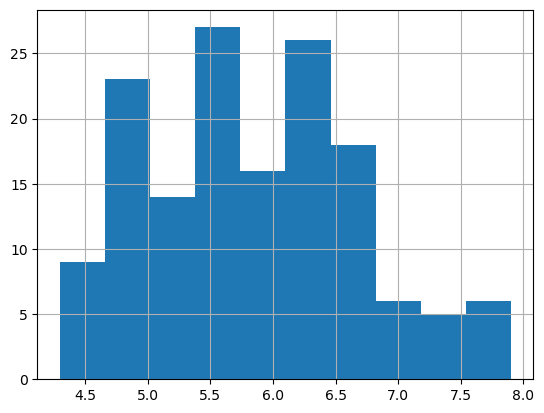

In [19]:
df["sepal_length"].hist()

<AxesSubplot:>

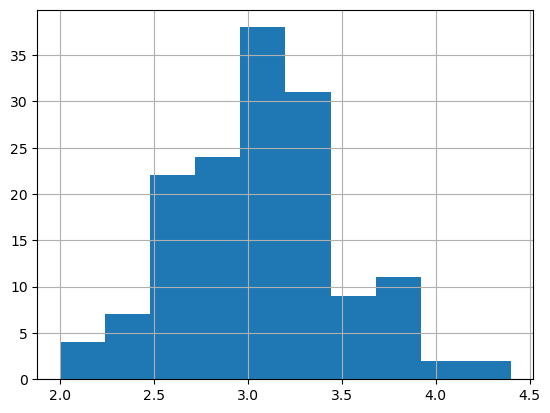

In [20]:
df["sepal_width"].hist()

<AxesSubplot:>

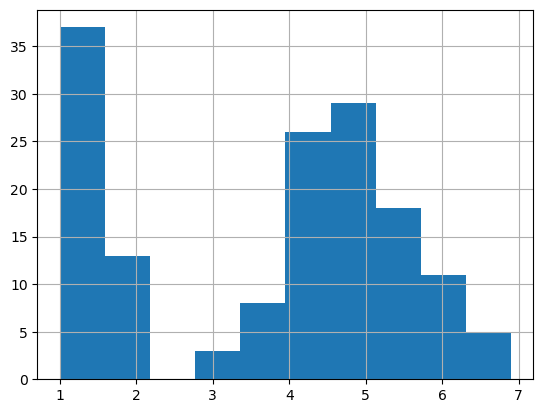

In [21]:
df["petal_length"].hist()

<AxesSubplot:>

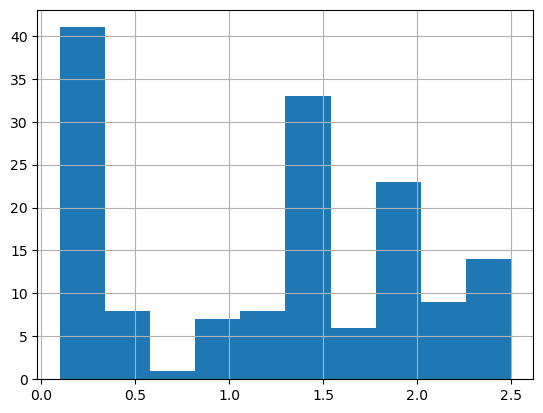

In [22]:
df["petal_width"].hist()

# scatter plot 

In [25]:
# scatterplot 
colors=['red','orange','blue']
species=["Iris-setosa", "Iris-versicolor", 
"Iris-virginica" ]

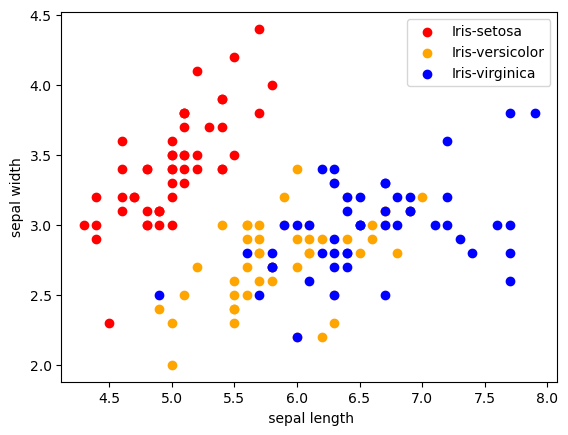

In [28]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c=colors[i],label=species[i])
plt.xlabel(" sepal length")
plt.ylabel("sepal width")
plt.legend()
    

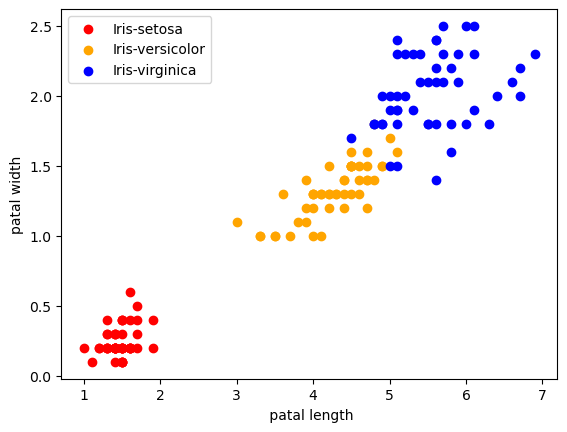

In [29]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c=colors[i],label=species[i])
plt.xlabel(" patal length")
plt.ylabel("patal width")
plt.legend()
    

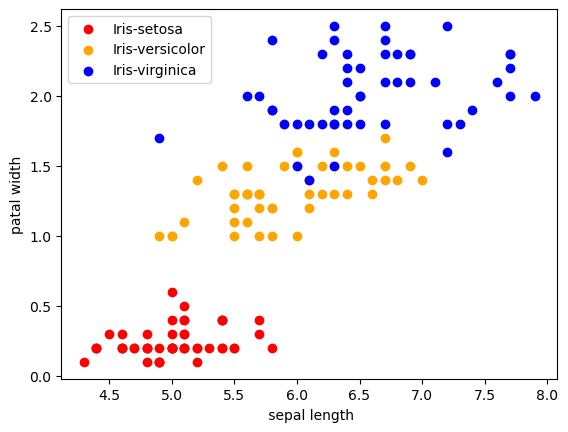

In [30]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'], c=colors[i],label=species[i])
plt.xlabel(" sepal length")
plt.ylabel("patal width")
plt.legend()
    

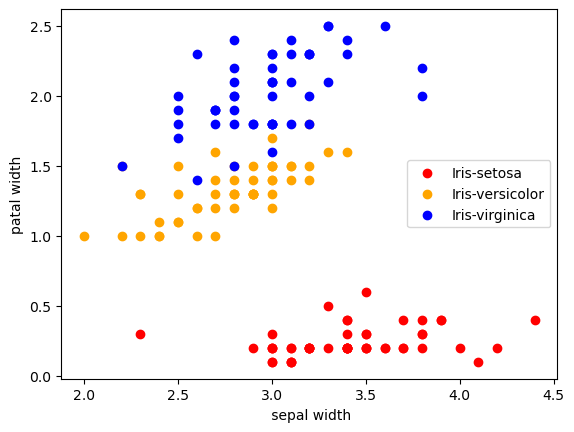

In [31]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c=colors[i],label=species[i])
plt.xlabel(" sepal width")
plt.ylabel("patal width")
plt.legend()

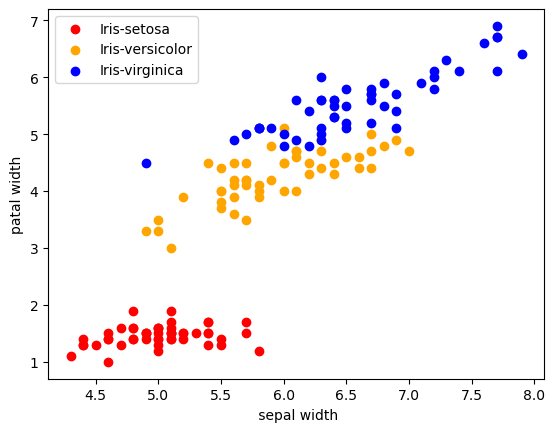

In [32]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c=colors[i],label=species[i])
plt.xlabel(" sepal width")
plt.ylabel("patal width")
plt.legend()

# correaltion matrix
### a correlation matrix is a table showing correaltion coefficient between the variable.each cell in table shows the correlation between two variables .the value is in the range -1 to 1 .if two variables have high correaltion. we can neglect one variable from those two.

In [33]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

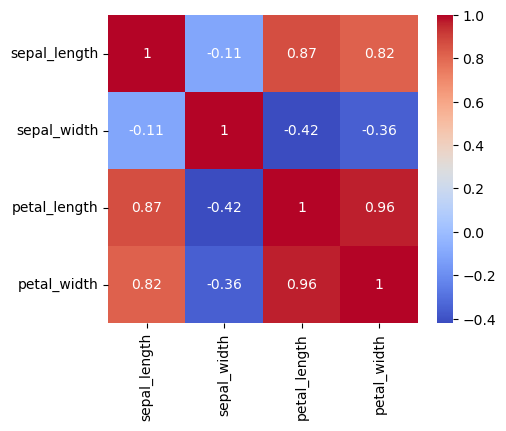

In [38]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sn.heatmap(corr,annot=True,ax=ax, cmap="coolwarm")

# label encoder
### in machine learning we usually deals with datsets which will contains multiple labels in one or more than one columns.these labels can be in the form of words or number .lables encoding refers to converting the lables into numeric form so as to convert it into -readable form.

In [40]:
# imported sklearn for preproceesing on datset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
# converted string data of species column into integer
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# model training 

In [50]:
from sklearn.model_selection import train_test_split
#train=70
#test=30
x=df.drop(columns=["species"])
y=df["species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [57]:
# logistic  regression 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [58]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
# print metric to get performance
print("accurracy:", model.score(x_test,y_test)*100)

accurracy: 100.0


In [62]:
#knn -k neighbors 
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [64]:
#print matics to get perrformance
print("accuracy:",model.score(x_test,y_test)*100)


accuracy: 93.33333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#decison tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [65]:
model.fit(x_train,y_train)


KNeighborsClassifier()

In [66]:
print("accuracy:",model.score(x_test,y_test)*100)


accuracy: 93.33333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
